In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/Project DeepLearning/

/content/drive/MyDrive/Project DeepLearning


In [3]:
# các thư viện cơ bản
import pickle
import matplotlib.pyplot as plt
import numpy as np

# Thư viện xử lý dữ liệu
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,learning_curve
from sklearn import preprocessing,metrics
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

#tensorflow
from tensorflow.keras import Model
from tensorflow.keras.layers import *
from tensorflow import optimizers
from tensorflow import math

#sklearn model
from sklearn import svm

In [4]:
data_train = pickle.load(open('Data/data_train.pkl', 'rb'))
data_test = pickle.load(open('Data/data_test.pkl', 'rb'))
target_train = pickle.load(open('Data/target_train.pkl', 'rb'))
target_test = pickle.load(open('Data/target_test.pkl', 'rb'))

In [ ]:
data_test[:5]
# print(target_train[:5])

["Chiều nay, tọa đàm 'phụ kiện ôtô - nên lắp hay không?'. Chuyên gia phụ kiện, chuyên viên bán xe sẽ đưa ra tư vấn về các phụ kiện hữu ích và cần thiết đối với xe hơi tại Việt Nam.Buổi tọa đàm lúc 14h hôm nay 27/10, sẽ cùng mổ xẻ các vấn đề liên quan đến phụ kiện và đồ chơi ôtô.Đồ chơi, phụ kiện xe hơi là những thứ được nhiều chủ xe quan tâm sau khi mua xe. Các câu hỏi đa số liên quan đến việc có nên lắp phụ kiện, lắp phụ kiện gì, phụ kiện nào là cần thiết, chế độ bảo hành, chi phí ra sao...Những vấn đề sẽ cùng được giải đáp với chuyên viên kỹ thuật anh Lê Đăng Trung, hơn 10 năm kinh nghiệm trong lĩnh vực đồ chơi, phụ kiện ôtô. Một khách mời khác là anh Hoàng Thanh Hải, chuyên viên bán hàng tại đại lý Toyota khu vực Hà Nội.Hai khách mời sẽ cùng đưa ra quan điểm về thế nào là đồ chơi, thế nào phụ kiện xe hơi, đâu là món phụ kiện cần lắp cho xe, các công dụng của những món phụ kiện này, lưu ý gì khi lắp đặt, chế độ bảo hành của sản phẩm và khi lắp có mất quyền lợi bảo hành chính hãng hay

In [5]:
number_topic = 12
input_len =300

In [6]:
id =[]
for i in range(number_topic):
   id.append([id for id in range(len(target_train)) if target_train[id] ==i])
   np.random.shuffle(id[i])

print([len(id[i]) for i in range(number_topic)])

[2006, 1836, 1927, 1978, 1856, 1890, 1737, 1942, 1802, 2388, 2033, 1909]


In [ ]:
# load dữ liệu các stopwords 
with open("Data/vietnamese-stopwords.txt") as f:
    stopwords = f.readlines()
stopwords = [x.strip().replace(" ", "_") for x in stopwords] 
print(f"Số lượng stopwords: {len(stopwords)}")
print(stopwords[:10])

# Chuyển hoá dữ liệu text về dạng vector TF 
#     - loại bỏ từ dừng
#     - sinh từ điển
module_count_vector = CountVectorizer(stop_words=stopwords)
model_rf_preprocess = Pipeline([('vect', module_count_vector),
                    ('tfidf', TfidfTransformer()),
                    ("svd",TruncatedSVD(n_components=input_len, random_state=42))
                    ])
# Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
# Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 
data_train_tfidf = model_rf_preprocess.fit_transform(data_train, target_train)
data_test_tfidf = model_rf_preprocess.transform(data_test)
print(f"\nSố lượng từ trong từ điển: {len(module_count_vector.vocabulary_)}")
pickle.dump(model_rf_preprocess, open('TFIDF/TFIDF.pkl',"wb"))

Số lượng stopwords: 2063
['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']

Số lượng từ trong từ điển: 97503


In [7]:
model_rf_preprocess= pickle.load(open('TFIDF/TFIDF.pkl', 'rb'))
data_train_tfidf = model_rf_preprocess.transform(data_train)
data_test_tfidf = model_rf_preprocess.transform(data_test)

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(data_train_tfidf, target_train, test_size=0.1, random_state=62)
x_test = data_test_tfidf
y_test = target_test

**Visualize data**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [ ]:
df_label = pd.DataFrame(data=Y_train, columns=["label"])
#t-SNE 2 chiều
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne-one', 'tsne-two'])
tsneDf = pd.concat([tsneDf, df_label], axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20973 samples in 0.005s...
[t-SNE] Computed neighbors for 20973 samples in 18.105s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20973
[t-SNE] Computed conditional probabilities for sample 2000 / 20973
[t-SNE] Computed conditional probabilities for sample 3000 / 20973
[t-SNE] Computed conditional probabilities for sample 4000 / 20973
[t-SNE] Computed conditional probabilities for sample 5000 / 20973
[t-SNE] Computed conditional probabilities for sample 6000 / 20973
[t-SNE] Computed conditional probabilities for sample 7000 / 20973
[t-SNE] Computed conditional probabilities for sample 8000 / 20973
[t-SNE] Computed conditional probabilities for sample 9000 / 20973
[t-SNE] Computed conditional probabilities for sample 10000 / 20973
[t-SNE] Computed conditional probabilities for sample 11000 / 20973
[t-SNE] Computed conditional probabilities for sample 12000 / 20973
[t-SNE] Computed conditional probabilities for s

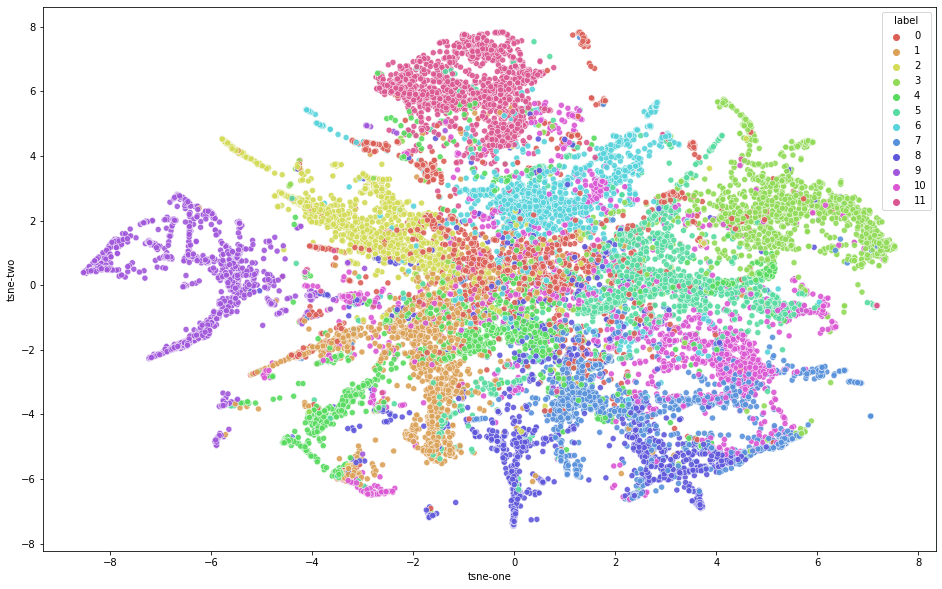

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="label",
    palette=sns.color_palette("hls", 12),
    data=tsneDf,
    legend="full",
    alpha=0.9
)

In [ ]:
# Kết hợp PCA và t-SNE
pca_25 = PCA(n_components=25)
pca_result_25 = pca_25.fit_transform(X_train)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(pca_result_25)
tsneDf = pd.DataFrame(data = tsne_results
             , columns = ['tsne-one', 'tsne-two'])
tsneDf = pd.concat([tsneDf, df_label], axis = 1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 20973 samples in 0.002s...
[t-SNE] Computed neighbors for 20973 samples in 11.390s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20973
[t-SNE] Computed conditional probabilities for sample 2000 / 20973
[t-SNE] Computed conditional probabilities for sample 3000 / 20973
[t-SNE] Computed conditional probabilities for sample 4000 / 20973
[t-SNE] Computed conditional probabilities for sample 5000 / 20973
[t-SNE] Computed conditional probabilities for sample 6000 / 20973
[t-SNE] Computed conditional probabilities for sample 7000 / 20973
[t-SNE] Computed conditional probabilities for sample 8000 / 20973
[t-SNE] Computed conditional probabilities for sample 9000 / 20973
[t-SNE] Computed conditional probabilities for sample 10000 / 20973
[t-SNE] Computed conditional probabilities for sample 11000 / 20973
[t-SNE] Computed conditional probabilities for sample 12000 / 20973
[t-SNE] Computed conditional probabilities for s

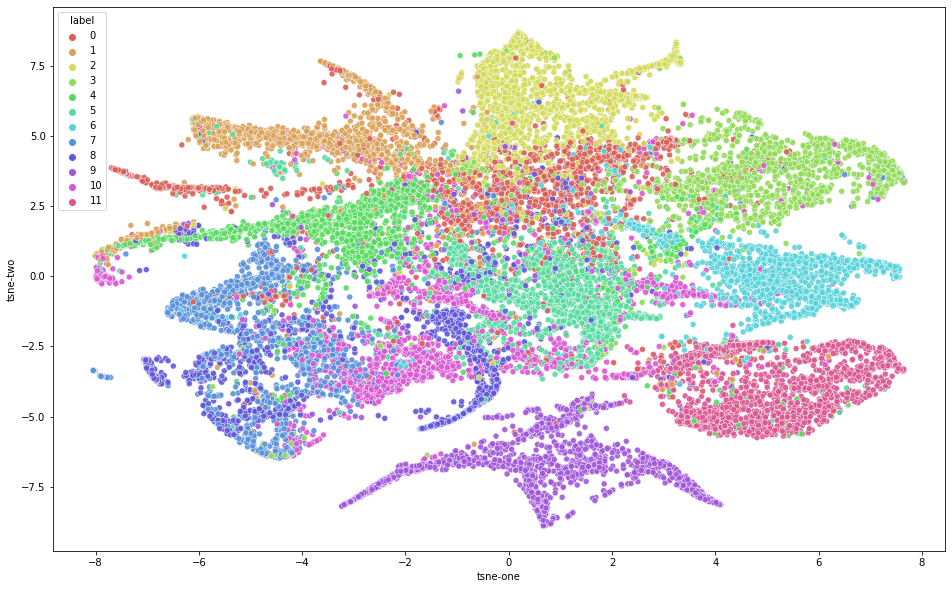

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-one", y="tsne-two",
    hue="label",
    palette=sns.color_palette("hls", 12),
    data=tsneDf,
    legend="full",
    alpha=0.9
)

**DNN**

In [ ]:
def evaluateann(classifier, X_val, Y_val, X_test, Y_test):
    val_predictions = classifier.predict(X_val).argmax(axis=-1)
    test_predictions = classifier.predict(X_test).argmax(axis=-1)
    cm = confusion_matrix(Y_test, test_predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()
    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, Y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, Y_test))

In [ ]:
def visual_history_train(history):
    # list all data in history
    # print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()
    
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validate'], loc='upper left')
    plt.show()

In [ ]:
# Set an optimizer
# opt = optimizers.Adam(
#     learning_rate=0.001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     name="Adam",
# )

def create_dnn_model():
    input_layer = Input(shape=(input_len,))
    layer1 = Dense(1024, activation='relu')(input_layer)
    layer2 = Dense(1024, activation='relu')(layer1)
    layer3 = Dense(512, activation='relu')(layer2)
    output_layer = Dense(number_topic, activation='softmax')(layer3)
    
    classifier = Model(input_layer, output_layer)
    classifier.summary()
    classifier.compile(optimizer=optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return classifier
dnn = create_dnn_model()
history = dnn.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=10, batch_size=512)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 dense_4 (Dense)             (None, 1024)              308224    
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_6 (Dense)             (None, 512)               524800    
                                                                 
 dense_7 (Dense)             (None, 12)                6156      
                                                                 
Total params: 1,888,780
Trainable params: 1,888,780
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
41/41 [==============================]

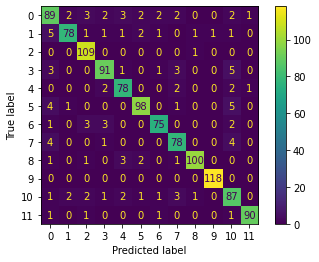

Validation accuracy:  0.9253539253539254
Test accuracy:  0.9091666666666667


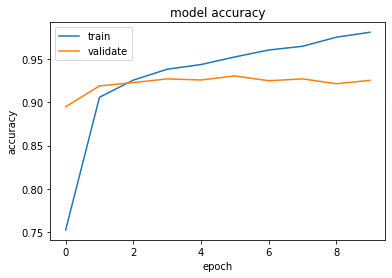

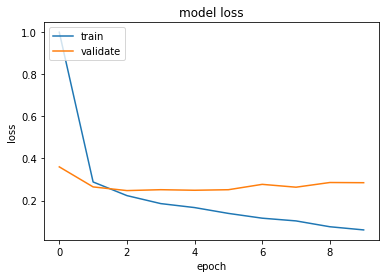

INFO:tensorflow:Assets written to: TFIDF/model/dnn.save/assets


In [ ]:
evaluateann(dnn, X_val=X_val, Y_val = Y_val,X_test= x_test, Y_test=y_test)
visual_history_train(history)
dnn.save('TFIDF/model/dnn.save')

# Các mô hình học máy

In [17]:
def evaluate(classifier, X_val, Y_val, X_test, Y_test):
    val_predictions = classifier.predict(X_val)
    test_predictions = classifier.predict(X_test)
    print("Validation accuracy: ", metrics.accuracy_score(val_predictions, Y_val))
    print("Test accuracy: ", metrics.accuracy_score(test_predictions, Y_test))

In [11]:
#Cross validation
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, Y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std
#Plot 
def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

100%|██████████| 4/4 [02:06<00:00, 31.54s/it]


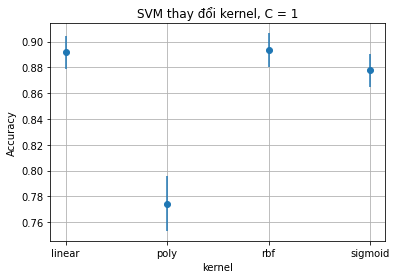

In [12]:
title = "SVM thay đổi kernel, C = 1"
xlabel = "kernel"
X = []
Y = []
error = []

for kernel in tqdm(['linear', 'poly', 'rbf', 'sigmoid']):
    # Với mỗi kernel được chọn, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    _clf = svm.SVC(kernel=kernel, C=1.0)
    mean, std = cross_validation(_clf)
    X.append(kernel)
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh 
plot(title, xlabel, X, Y, error)
plt.savefig('TFIDF/svm_change_kernel.png', bbox_inches='tight')
plt.show()

100%|██████████| 5/5 [04:12<00:00, 50.60s/it]


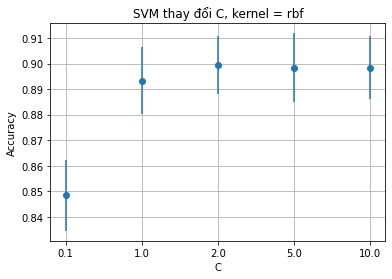

In [13]:
title = "SVM thay đổi C, kernel = rbf"
xlabel = "C"
X = []
Y = []
error = []

for C in tqdm([.1, 1.0, 2.0, 5.0, 10.0]):
    # Với từng giá trị C nhận được, 
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    _clf = svm.SVC(kernel='rbf', C=C)
    mean, std = cross_validation(_clf)
    X.append(str(C))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
plt.savefig('TFIDF/svm_change_C.png', bbox_inches='tight')
plt.show()

In [14]:
svm_model = svm.SVC(kernel='rbf', C=2)
svm_model.fit(X_train,Y_train)

SVC(C=2)

In [18]:
evaluate(svm_model, X_val, Y_val, x_test, y_test)

Validation accuracy:  0.882
Test accuracy:  0.9066666666666666
